<a href="https://colab.research.google.com/github/simsekergun/RingThicknessPrediction/blob/main/RingThicknessPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
XY_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Greg_DSF_n_mode1.csv', header=None)

In [5]:
XY_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,8.200000e-07,6.850000e-07,1.9467,1.9447,1.9427,1.9407,1.9387,1.9367,1.9347,1.9328,...,1.7653,1.7633,1.7612,1.7592,1.7572,1.7552,1.7532,1.7511,1.7491,1.7471
1,0.000000e+00,6.900000e-07,1.9473,1.9453,1.9433,1.9413,1.9393,1.9373,1.9354,1.9334,...,1.7665,1.7644,1.7624,1.7604,1.7584,1.7564,1.7544,1.7523,1.7503,1.7483
2,0.000000e+00,6.950000e-07,1.9478,1.9458,1.9438,1.9419,1.9399,1.9379,1.9360,1.9340,...,1.7676,1.7656,1.7636,1.7616,1.7596,1.7576,1.7555,1.7535,1.7515,1.7495
3,0.000000e+00,6.980000e-07,1.9481,1.9462,1.9442,1.9422,1.9402,1.9383,1.9363,1.9344,...,1.7683,1.7663,1.7643,1.7623,1.7603,1.7583,1.7562,1.7542,1.7522,1.7502
4,0.000000e+00,7.000000e-07,1.9484,1.9464,1.9444,1.9424,1.9405,1.9385,1.9366,1.9346,...,1.7688,1.7667,1.7647,1.7627,1.7607,1.7587,1.7567,1.7547,1.7527,1.7507


In [7]:
Y_train = XY_train.iloc[:,1]*1e9
print(Y_train)

0    685.0
1    690.0
2    695.0
3    698.0
4    700.0
5    702.0
6    705.0
7    710.0
8    715.0
Name: 1, dtype: float64


In [14]:
X_train = XY_train.iloc[:,2::]
X_train.shape

(9, 101)

In [15]:
XY_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Greg_DSF_Test_mode1.csv', header=None)
Y_test = XY_test.iloc[:,1]*1e9
X_test = XY_test.iloc[:,2::]

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()         # Instantiate
reg.fit(X_train, Y_train)        # Fit the train data

r2_train_score = reg.score(X_train, Y_train)   # Calculating R^2 score for training
print('R^2 score for n-train dataset = ', round(r2_train_score, 4), '\n')

R^2 score for n-train dataset =  1.0 



In [17]:
pred_thickness = reg.predict(X_test)
print(pred_thickness)

[680.54462409 687.87142716 699.07365119 703.07931513 711.88838676
 719.53906816]


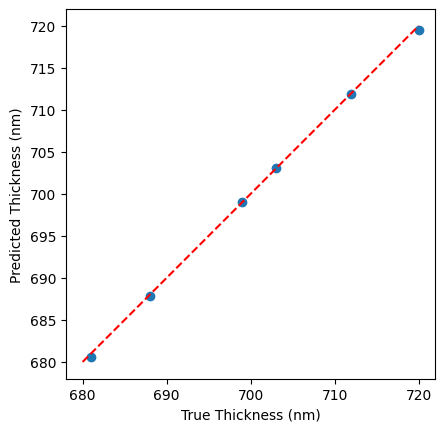

In [27]:
plt.figure(1)
plt.scatter(Y_test,pred_thickness)
plt.plot([680,720],[680,720],color='r', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('True Thickness (nm)')
plt.ylabel('Predicted Thickness (nm)')
plt.show()

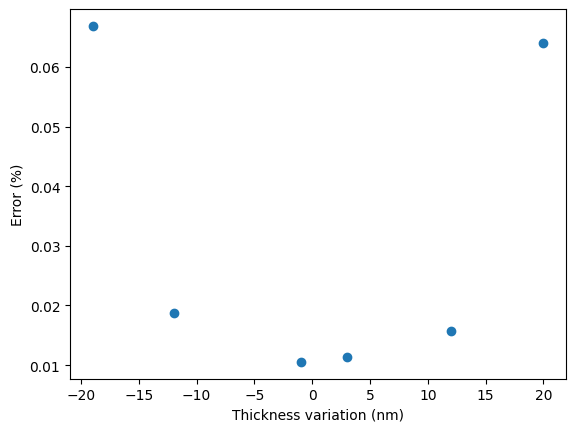

In [25]:
error_p = abs(Y_test-pred_thickness)/Y_test*100
plt.figure(2)
plt.scatter(Y_test-700,error_p)
plt.xlabel('Thickness variation (nm)')
plt.ylabel('Error (%)')
plt.show()

In [28]:
print(Y_test)

0    681.0
1    688.0
2    699.0
3    703.0
4    712.0
5    720.0
Name: 1, dtype: float64
